In [1]:
from mnist_dataset import ImageAndLabelSet
from networks import FCNet, ResNet6
import numpy as np
from os import path
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
# Get the dataset
mnist_data_root = path.expanduser("~/data/mnist")

image_and_label_set = ImageAndLabelSet(path.join(mnist_data_root, 'train-images-idx3-ubyte'),
                                       path.join(mnist_data_root, 'train-labels-idx1-ubyte'),
                                       training_fraction=(5.0/6.0))

# Fully Connected Network

In [ ]:
# Define a network that downsamples and then trains a single FC layer
fc_net = FCNet()

for b in range(1000):
    image_batch, label_batch = image_and_label_set.get_next_training_batch(batch_size=32)
    image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension
    
    fc_net.train_batch(image_batch, label_batch)
    
    if b % 100 == 0:
        print('batch {}: CE: {}\tacc: {}'.format(b, fc_net._running_ce.get(), fc_net._running_acc.get()))

In [ ]:
# Plot the training results for this network
fig, ax = plt.subplots()
ax.plot(fc_net._ce_history)
ax2 = ax.twinx()
ax2.plot([100.0*(1.0 - x) for x in fc_net._acc_history], 'r')
ax2.set_yscale('log')
ax2.set_ylabel('Error rate (%)')
plt.show()

# ResNet6

In [ ]:
res_net = ResNet6()

for b in range(10000):
    image_batch, label_batch = image_and_label_set.get_next_training_batch(batch_size=32)
    image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension
    
    res_net.train_batch(image_batch, label_batch)
    
    if b % 500 == 0:
        print('batch {}: CE: {}\tacc: {}'.format(b, res_net._running_ce.get(), res_net._running_acc.get()))
        
    if b % 500 == 0:
        res_net.evaluate_on_batch_generator(image_and_label_set.get_validation_batches())
            
        

In [ ]:
res_net.show_report()

## Hyperparameter tuning - learning rate

In [10]:
learning_rates = [3e-2, 2e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4]
validation_errors = []
# FIXME - should maybe make a way to store the plots as well

for learning_rate in learning_rates:
    res_net = ResNet6(learning_rate=learning_rate)

    for b in tqdm(range(10000)):
        image_batch, label_batch = image_and_label_set.get_next_training_batch(batch_size=32)
        image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension

        res_net.train_batch(image_batch, label_batch)
        
    res_net.evaluate_on_batch_generator(image_and_label_set.get_validation_batches())

    validation_errors.append(res_net.get_final_validation_error())

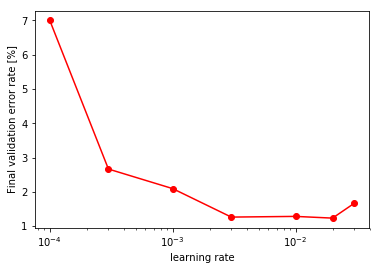

In [11]:
fig, ax = plt.subplots()

ax.plot(learning_rates, [100.0*e for e in validation_errors], 'r-o')
ax.set_xscale('log')
ax.set_xlabel('learning rate')
ax.set_ylabel('Final validation error rate [%]')
plt.show()